In [1]:
import pandas as pd
import pickle
from prophet import Prophet
import os

# Load and preprocess your data
base = pd.read_csv('BSinfo.csv')
cell = pd.read_csv('CLdata.csv')
energy = pd.read_csv('ECdata.csv')

CLdata_grouped = cell.groupby(['BS', 'Time']).sum().reset_index()
base_cell_energy = pd.merge(CLdata_grouped, energy, on=('Time','BS'), how='inner')

base_cell_energy['BS'] = base_cell_energy['BS'].str.replace('B_', '')
base_cell_energy['Time'] = pd.to_datetime(base_cell_energy['Time'])

# Get unique base station values from the dataset
unique_base_stations = base_cell_energy['BS'].unique()

# Create a directory to save models
save_dir = 'saved_models_load_ES_sum1'
os.makedirs(save_dir, exist_ok=True)

data = base_cell_energy.copy()
# Resample the data and fill missing values
data.set_index('Time', inplace=True)
data_resampled = data.resample('H').mean()
data_resampled['Energy'].fillna(method='ffill', inplace=True)

# Rename columns for Prophet
data_resampled.rename(columns={'Energy': 'y'}, inplace=True)
data_resampled.reset_index(inplace=True)
data_resampled.rename(columns={'Time': 'ds'}, inplace=True)

# Fill missing values in the 'load' column with the mode
mode_load = data_resampled['load'].mode()[0]  # Get the first mode if there are multiple
data_resampled['load'].fillna(mode_load, inplace=True)

# Fill missing values in the 'ESMode1' column with the mean
mean_ES1 = data_resampled['ESMode1'].mean()
data_resampled['ESMode1'].fillna(mean_ES1, inplace=True)

# Fill missing values in the 'ESMode2' column with the mean
mean_ES2 = data_resampled['ESMode2'].mean()
data_resampled['ESMode2'].fillna(mean_ES2, inplace=True)

# Fill missing values in the 'ESMode6' column with the mean
mean_ES6 = data_resampled['ESMode6'].mean()
data_resampled['ESMode6'].fillna(mean_ES6, inplace=True)

# Create and fit the general Prophet model
general_model = Prophet()
general_model.add_regressor('load')
general_model.add_regressor('ESMode1')
general_model.add_regressor('ESMode2')
general_model.add_regressor('ESMode6')
general_model.fit(data_resampled)

# Save the general model to a file in the 'saved_models' folder
general_model_filename = os.path.join(save_dir, 'general_model.pkl')
with open(general_model_filename, 'wb') as f:
    pickle.dump(general_model, f)


# Train and save separate models for each base station
for bs in unique_base_stations:
    # Filter data for a specific base station
    bs_data = base_cell_energy[base_cell_energy['BS'] == bs]

    # Skip base stations with insufficient data
    if bs_data.shape[0] < 2:
        print(f"Skipping Base Station {bs} due to insufficient data")
        continue

    # Resample the data and fill missing values (rest of the preprocessing steps)
    bs_data.set_index('Time', inplace=True)
    bs_data_resampled = bs_data.resample('H').mean()
    bs_data_resampled['Energy'].fillna(method='ffill', inplace=True)
    bs_data_resampled.rename(columns={'Energy': 'y'}, inplace=True)
    bs_data_resampled.reset_index(inplace=True)
    bs_data_resampled.rename(columns={'Time': 'ds'}, inplace=True)

    # Fill missing values in the 'load' column with the mode
    mode_load = bs_data_resampled['load'].mode()[0]  # Get the first mode if there are multiple
    bs_data_resampled['load'].fillna(mode_load, inplace=True)

    # Fill missing values in the 'ESMode1' column with the mean
    mean_ES1 = bs_data_resampled['ESMode1'].mean()
    bs_data_resampled['ESMode1'].fillna(mean_ES1, inplace=True)

    # Fill missing values in the 'ESMode2' column with the mean
    mean_ES2 = bs_data_resampled['ESMode2'].mean()
    bs_data_resampled['ESMode2'].fillna(mean_ES2, inplace=True)

    # Fill missing values in the 'ESMode6' column with the mean
    mean_ES6 = bs_data_resampled['ESMode6'].mean()
    bs_data_resampled['ESMode6'].fillna(mean_ES6, inplace=True)


    # Create and fit the Prophet model
    model = Prophet()
    model.add_regressor('load')
    model.add_regressor('ESMode1')
    model.add_regressor('ESMode2')
    model.add_regressor('ESMode6')
    model.fit(bs_data_resampled)

    # Save the model to a file in the 'saved_models' folder
    model_filename = os.path.join(save_dir, f'model_B_{bs}.pkl')
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)


20:53:21 - cmdstanpy - INFO - Chain [1] start processing
20:53:22 - cmdstanpy - INFO - Chain [1] done processing
20:53:22 - cmdstanpy - INFO - Chain [1] start processing
20:53:22 - cmdstanpy - INFO - Chain [1] done processing
20:53:22 - cmdstanpy - INFO - Chain [1] start processing
20:53:22 - cmdstanpy - INFO - Chain [1] done processing
20:53:23 - cmdstanpy - INFO - Chain [1] start processing
20:53:23 - cmdstanpy - INFO - Chain [1] done processing
20:53:23 - cmdstanpy - INFO - Chain [1] start processing
20:53:23 - cmdstanpy - INFO - Chain [1] done processing
20:53:23 - cmdstanpy - INFO - Chain [1] start processing
20:53:23 - cmdstanpy - INFO - Chain [1] done processing
20:53:23 - cmdstanpy - INFO - Chain [1] start processing
20:53:23 - cmdstanpy - INFO - Chain [1] done processing
20:53:24 - cmdstanpy - INFO - Chain [1] start processing
20:53:24 - cmdstanpy - INFO - Chain [1] done processing
20:53:24 - cmdstanpy - INFO - Chain [1] start processing
20:53:24 - cmdstanpy - INFO - Chain [1]

Skipping Base Station 835 due to insufficient data


20:55:46 - cmdstanpy - INFO - Chain [1] start processing
20:55:46 - cmdstanpy - INFO - Chain [1] done processing
20:55:46 - cmdstanpy - INFO - Chain [1] start processing
20:55:46 - cmdstanpy - INFO - Chain [1] done processing
20:55:46 - cmdstanpy - INFO - Chain [1] start processing
20:55:46 - cmdstanpy - INFO - Chain [1] done processing
20:55:47 - cmdstanpy - INFO - Chain [1] start processing
20:55:47 - cmdstanpy - INFO - Chain [1] done processing
20:55:47 - cmdstanpy - INFO - Chain [1] start processing
20:55:47 - cmdstanpy - INFO - Chain [1] done processing
20:55:47 - cmdstanpy - INFO - Chain [1] start processing
20:55:47 - cmdstanpy - INFO - Chain [1] done processing
20:55:47 - cmdstanpy - INFO - Chain [1] start processing
20:55:47 - cmdstanpy - INFO - Chain [1] done processing
20:55:48 - cmdstanpy - INFO - Chain [1] start processing
20:55:48 - cmdstanpy - INFO - Chain [1] done processing
20:55:48 - cmdstanpy - INFO - Chain [1] start processing
20:55:48 - cmdstanpy - INFO - Chain [1]

Skipping Base Station 854 due to insufficient data


20:55:49 - cmdstanpy - INFO - Chain [1] done processing
20:55:49 - cmdstanpy - INFO - Chain [1] start processing
20:55:49 - cmdstanpy - INFO - Chain [1] done processing
20:55:49 - cmdstanpy - INFO - Chain [1] start processing
20:55:49 - cmdstanpy - INFO - Chain [1] done processing
20:55:49 - cmdstanpy - INFO - Chain [1] start processing
20:55:50 - cmdstanpy - INFO - Chain [1] done processing
20:55:50 - cmdstanpy - INFO - Chain [1] start processing
20:55:50 - cmdstanpy - INFO - Chain [1] done processing
20:55:50 - cmdstanpy - INFO - Chain [1] start processing
20:55:50 - cmdstanpy - INFO - Chain [1] done processing
20:55:50 - cmdstanpy - INFO - Chain [1] start processing
20:55:50 - cmdstanpy - INFO - Chain [1] done processing
20:55:50 - cmdstanpy - INFO - Chain [1] start processing
20:55:51 - cmdstanpy - INFO - Chain [1] done processing
20:55:51 - cmdstanpy - INFO - Chain [1] start processing
20:55:51 - cmdstanpy - INFO - Chain [1] done processing
20:55:51 - cmdstanpy - INFO - Chain [1] 

In [2]:
import pandas as pd
import pickle
import os

# Load the new dataset
base = pd.read_csv('BSinfo.csv')
cell = pd.read_csv('CLdata.csv')
submit = pd.read_csv("PCprediction.csv")
print(submit.shape)

CLdata_grouped = cell.groupby(['BS', 'Time']).sum().reset_index()
cell_submit = pd.merge(CLdata_grouped, submit, on=('Time','BS'), how='inner')

cell_submit['Energy'] = 0
# cell_submit = cell_submit.drop_duplicates(subset=['Time', 'BS'], keep='first')
cell_submit= cell_submit[['Time', 'BS', 'Energy', 'load','ESMode1','ESMode2','ESMode6']]
cell_submit['Time'] = pd.to_datetime(cell_submit['Time'])
unique_base_stations_submit = cell_submit['BS'].unique()

print(unique_base_stations_submit)

# Load the general model
save_dir = 'saved_models_load_ES_sum1'
general_model_filename = os.path.join(save_dir, 'general_model.pkl')
with open(general_model_filename, 'rb') as f:
    general_model = pickle.load(f)


for bs in unique_base_stations_submit:
    # Load the corresponding Prophet model if available, otherwise use the general model
    model_filename = os.path.join(save_dir, f'model_{bs}.pkl')
    
    if os.path.exists(model_filename):
        with open(model_filename, "rb") as f:
            loaded_model = pickle.load(f)
    else:
        print(bs)
        print(f'model_{bs}.pkl')
        # Use the general model if the specific model is not available
        loaded_model = general_model
    
    # Filter new data for the specific base station
    bs_data_submit = cell_submit[cell_submit['BS'] == bs]

    # Create the 'future' DataFrame for prediction
    future = pd.DataFrame({'ds': bs_data_submit['Time']})
    
    # Add columns to the 'future' DataFrame
    future['load'] = bs_data_submit['load']
    future['ESMode1'] = bs_data_submit['ESMode1']
    future['ESMode2'] = bs_data_submit['ESMode2']
    future['ESMode6'] = bs_data_submit['ESMode6']

    # Use the loaded model to predict values for the new data
    forecast = loaded_model.predict(future)


    # Update the 'Energy' column in the submit DataFrame with predictions
    submit.loc[submit['BS'] == bs, 'Energy'] = forecast['yhat'].values

submit['Time'] = pd.to_datetime(submit['Time'])

# Create the 'ID' column by joining 'Time' and 'BS' columns
submit['ID'] = submit['Time'].astype(str) + '_' + submit['BS']

# Remove unnecessary columns and reorder columns
submit = submit[['ID', 'Energy']]

# Save the submission file
submit.to_csv('SampleSubmission__51_.csv', index=False)
print(submit.shape)

submit.head()

(26139, 4)
['B_0' 'B_1' 'B_10' ... 'B_997' 'B_998' 'B_999']
B_1000
model_B_1000.pkl
B_1001
model_B_1001.pkl
B_1002
model_B_1002.pkl
B_1008
model_B_1008.pkl
B_1009
model_B_1009.pkl
B_1010
model_B_1010.pkl
B_1011
model_B_1011.pkl
B_1012
model_B_1012.pkl
B_1013
model_B_1013.pkl
B_1014
model_B_1014.pkl
B_1015
model_B_1015.pkl
B_1016
model_B_1016.pkl
B_1017
model_B_1017.pkl
B_1019
model_B_1019.pkl
B_13
model_B_13.pkl
B_274
model_B_274.pkl
B_315
model_B_315.pkl
B_363
model_B_363.pkl
B_651
model_B_651.pkl
B_827
model_B_827.pkl
B_828
model_B_828.pkl
B_835
model_B_835.pkl
B_837
model_B_837.pkl
B_838
model_B_838.pkl
B_840
model_B_840.pkl
B_841
model_B_841.pkl
B_842
model_B_842.pkl
B_843
model_B_843.pkl
B_848
model_B_848.pkl
B_849
model_B_849.pkl
B_850
model_B_850.pkl
B_854
model_B_854.pkl
B_855
model_B_855.pkl
B_861
model_B_861.pkl
B_862
model_B_862.pkl
B_864
model_B_864.pkl
B_867
model_B_867.pkl
B_869
model_B_869.pkl
B_875
model_B_875.pkl
B_876
model_B_876.pkl
B_877
model_B_877.pkl
B_878
model_

,ID,Energy
0,2023-01-01 06:00:00_B_0,62.535943
1,2023-01-01 11:00:00_B_0,74.933075
2,2023-01-01 12:00:00_B_0,73.765103
3,2023-01-01 13:00:00_B_0,72.990438
4,2023-01-01 23:00:00_B_0,79.506291


# RUType

<AxesSubplot:xlabel='Time'>

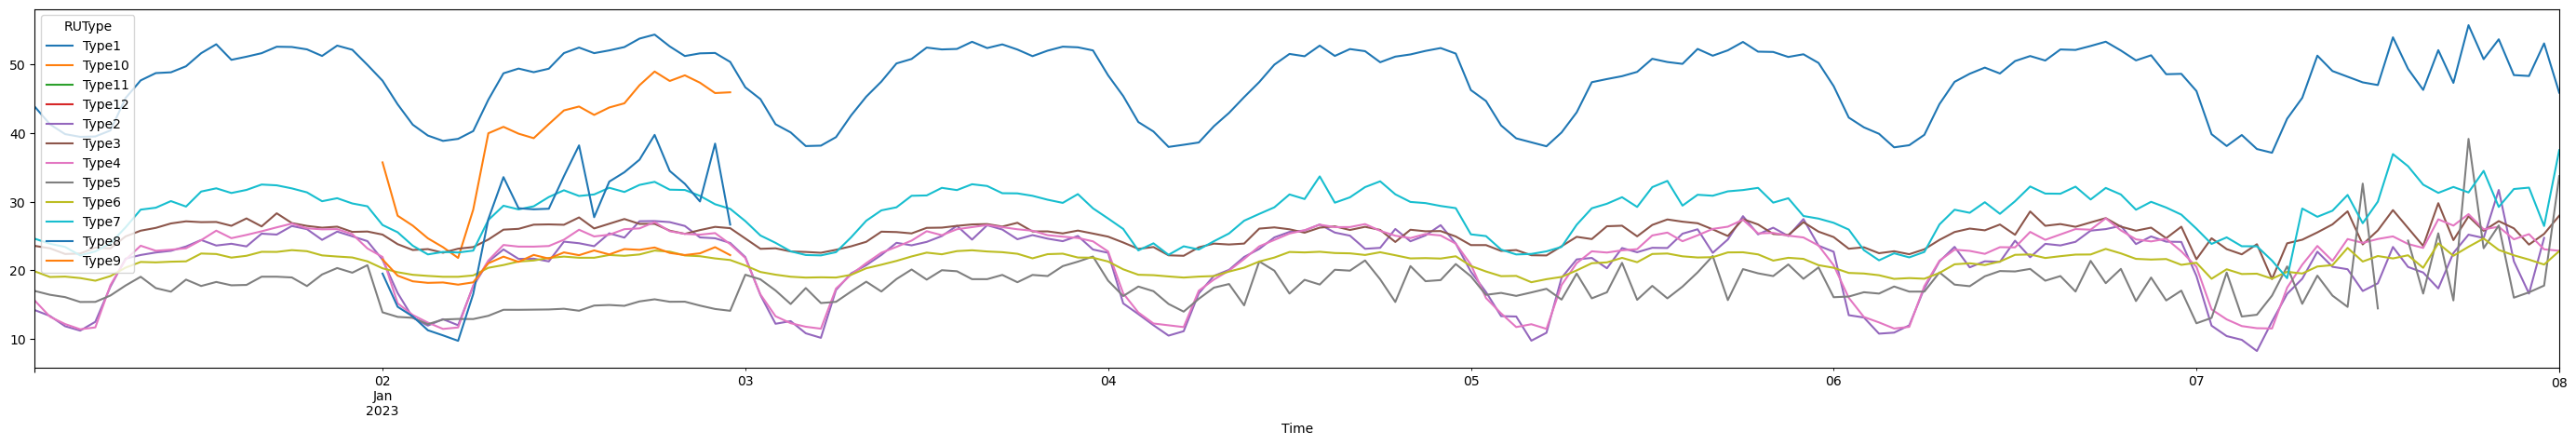

In [3]:
import pandas as pd

# Load and preprocess your data
base = pd.read_csv('BSinfo.csv')
cell = pd.read_csv('CLdata.csv')
energy = pd.read_csv('ECdata.csv')

base_cell = pd.merge(cell, base, on=['BS', 'CellName'], how='left')
base_cell_energy = pd.merge(base_cell, energy, on=['Time', 'BS'], how='inner')

# change Time column to datetime
base_cell_energy['Time'] = pd.to_datetime(base_cell_energy['Time'])
# groupby RUTypes and Time
base_cell_energy.groupby(['RUType', 'Time']).mean()
# drwa a plot each RUTypes

base_cell_energy.pivot_table(index='Time', columns='RUType', values='Energy', aggfunc='mean').plot(kind='line', figsize=(35, 5))

In [4]:
import pandas as pd
import pickle
from prophet import Prophet
import os

# Load and preprocess your data
base = pd.read_csv('BSinfo.csv')
cell = pd.read_csv('CLdata.csv')
energy = pd.read_csv('ECdata.csv')

base_cell = pd.merge(cell, base, on=['BS', 'CellName'], how='left')
base_cell_energy = pd.merge(base_cell, energy, on=['Time', 'BS'], how='inner')

base_cell_energy['BS'] = base_cell_energy['BS'].str.replace('B_', '')
base_cell_energy['Time'] = pd.to_datetime(base_cell_energy['Time'])

# Get unique RUType values from the dataset
unique_rutypes = base_cell_energy['RUType'].unique()

# Create a directory to save models
save_dir = 'saved_models_rutype'
os.makedirs(save_dir, exist_ok=True)

# Resample the data and fill missing values
data = base_cell_energy.copy()
data.set_index('Time', inplace=True)
data_resampled = data.resample('H').median()
data_resampled['Energy'].fillna(method='ffill', inplace=True)

# Rename columns for Prophet
data_resampled.rename(columns={'Energy': 'y'}, inplace=True)
data_resampled.reset_index(inplace=True)
data_resampled.rename(columns={'Time': 'ds'}, inplace=True)

# Create and fit the general Prophet model
general_model = Prophet()
general_model.add_regressor('load')
general_model.add_regressor('ESMode1')
general_model.add_regressor('ESMode2')
general_model.add_regressor('ESMode6')
general_model.fit(data_resampled)

# Save the general model to a file in the 'saved_models_general' folder
general_model_filename = os.path.join(save_dir, 'general_model.pkl')
with open(general_model_filename, 'wb') as f:
    pickle.dump(general_model, f)

for rutype in unique_rutypes:
    rutype_data = base_cell_energy[base_cell_energy['RUType'] == rutype]

    # Skip base stations with insufficient data
    if rutype_data.shape[0] < 2:
        print(f"Skipping Base Station {bs} due to insufficient data")
        continue

    # Resample the data and fill missing values
    rutype_data.set_index('Time', inplace=True)
    rutype_data_resampled = rutype_data.resample('H').median()
    rutype_data_resampled['Energy'].fillna(method='ffill', inplace=True)

    # Rename columns for Prophet
    rutype_data_resampled.rename(columns={'Energy': 'y'}, inplace=True)
    rutype_data_resampled.reset_index(inplace=True)
    rutype_data_resampled.rename(columns={'Time': 'ds'}, inplace=True)

    # Fill missing values in the 'load' column with the mode
    mode_load = rutype_data_resampled['load'].mode()[0]  # Get the first mode if there are multiple
    rutype_data_resampled['load'].fillna(mode_load, inplace=True)

    # Fill missing values in the 'ESMode1' column with the mean
    mean_ES1 = rutype_data_resampled['ESMode1'].mean()
    rutype_data_resampled['ESMode1'].fillna(mean_ES1, inplace=True)

    # Fill missing values in the 'ESMode2' column with the mean
    mean_ES2 = rutype_data_resampled['ESMode2'].mean()
    rutype_data_resampled['ESMode2'].fillna(mean_ES2, inplace=True)

    # Fill missing values in the 'ESMode6' column with the mean
    mean_ES6 = rutype_data_resampled['ESMode6'].mean()
    rutype_data_resampled['ESMode6'].fillna(mean_ES6, inplace=True)

    # Create and fit the Prophet model
    model = Prophet()
    model.add_regressor('load')
    model.add_regressor('ESMode1')
    model.add_regressor('ESMode2')
    model.add_regressor('ESMode6')
    model.fit(rutype_data_resampled)

    # Save the model to a file in the 'saved_models_rutype' folder
    model_filename = os.path.join(save_dir, f'model_{rutype}.pkl')
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)


20:58:46 - cmdstanpy - INFO - Chain [1] start processing
20:58:46 - cmdstanpy - INFO - Chain [1] done processing
20:58:47 - cmdstanpy - INFO - Chain [1] start processing
20:58:47 - cmdstanpy - INFO - Chain [1] done processing
20:58:47 - cmdstanpy - INFO - Chain [1] start processing
20:58:47 - cmdstanpy - INFO - Chain [1] done processing
20:58:47 - cmdstanpy - INFO - Chain [1] start processing
20:58:47 - cmdstanpy - INFO - Chain [1] done processing
20:58:47 - cmdstanpy - INFO - Chain [1] start processing
20:58:47 - cmdstanpy - INFO - Chain [1] done processing
20:58:47 - cmdstanpy - INFO - Chain [1] start processing
20:58:48 - cmdstanpy - INFO - Chain [1] done processing
20:58:48 - cmdstanpy - INFO - Chain [1] start processing
20:58:48 - cmdstanpy - INFO - Chain [1] done processing
20:58:48 - cmdstanpy - INFO - Chain [1] start processing
20:58:48 - cmdstanpy - INFO - Chain [1] done processing
20:58:48 - cmdstanpy - INFO - Chain [1] start processing
20:58:48 - cmdstanpy - INFO - Chain [1]

Skipping Base Station B_999 due to insufficient data
Skipping Base Station B_999 due to insufficient data


In [5]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt

# Load the new dataset
base = pd.read_csv('BSinfo.csv')
cell = pd.read_csv('CLdata.csv')
submit = pd.read_csv("PCprediction.csv")
print(submit.shape)


base_cell = pd.merge(cell, base, on=['BS', 'CellName'], how='left')
base_cell_energy = pd.merge(base_cell, submit, on=['Time', 'BS'], how='inner')

# base_cell_energy['BS'] = base_cell_energy['BS'].str.replace('B_', '')
base_cell_energy['Time'] = pd.to_datetime(base_cell_energy['Time'])
base_cell_energy['Energy'] = 0
base_cell_energy = base_cell_energy.drop_duplicates(subset=['Time', 'BS'], keep='first')
base_cell_energy = base_cell_energy[['Time', 'BS','RUType', 'Energy', 'load','ESMode1','ESMode2','ESMode6']]
base_cell_energy['Time'] = pd.to_datetime(base_cell_energy['Time'])
unique_rutypes_submit = base_cell_energy['RUType'].unique()

print(unique_rutypes_submit)

# Load the general model
save_dir = 'saved_models_rutype'
general_model_filename = os.path.join(save_dir, 'general_model.pkl')
with open(general_model_filename, 'rb') as f:
    general_model = pickle.load(f)

for rutype in unique_rutypes_submit:
    # Load the corresponding Prophet model if available, otherwise use the general model
    model_filename = os.path.join(save_dir, f'model_{rutype}.pkl')
    
    if os.path.exists(model_filename):
        with open(model_filename, "rb") as f:
            loaded_model = pickle.load(f)
    else:
        print(rutype)
        # Use the general model if the specific model is not available
        loaded_model = general_model
    
    # Filter new data for the specific RUType
    rutype_data_submit = base_cell_energy[base_cell_energy['RUType'] == rutype]

    # Create the 'future' DataFrame for prediction
    future = pd.DataFrame({'ds': rutype_data_submit['Time']})
    
    # Add columns to the 'future' DataFrame
    future['load'] = rutype_data_submit['load']
    future['ESMode1'] = rutype_data_submit['ESMode1']
    future['ESMode2'] = rutype_data_submit['ESMode2']
    future['ESMode6'] = rutype_data_submit['ESMode6']

    # Use the loaded model to predict values for the new data
    forecast = loaded_model.predict(future)

    # Update the 'Energy' column in the submit DataFrame with predictions
    base_cell_energy.loc[base_cell_energy['RUType'] == rutype, 'Energy'] = forecast['yhat'].values

base_cell_energy['Time'] = pd.to_datetime(base_cell_energy['Time'])

temp=base_cell_energy.copy()

# Create the 'ID' column by joining 'Time' and 'RUType' columns
base_cell_energy['ID'] = base_cell_energy['Time'].astype(str) + '_' + base_cell_energy['BS']

# Remove unnecessary columns and reorder columns
base_cell_energy = base_cell_energy[['ID', 'Energy']]

# Save the submission file
base_cell_energy.to_csv('SampleSubmission__52_.csv', index=False)
print(base_cell_energy.shape)

base_cell_energy.head()


(26139, 4)
['Type1' 'Type2' 'Type3' 'Type4' 'Type5' 'Type6' 'Type7' 'Type8' 'Type9'
 'Type10' 'Type11' 'Type12']
Type11
Type12
(26139, 2)


,ID,Energy
0,2023-01-01 06:00:00_B_0,45.497474
1,2023-01-01 11:00:00_B_0,44.341800
2,2023-01-01 12:00:00_B_0,45.211163
3,2023-01-01 13:00:00_B_0,43.362015
4,2023-01-01 23:00:00_B_0,42.667805


In [8]:
import pandas as pd
import pickle
from prophet import Prophet
import os

# Load the new dataset
base = pd.read_csv('BSinfo.csv')
cell = pd.read_csv('CLdata.csv')

base_cell = pd.merge(cell, base, on=['BS', 'CellName'], how='left')
base_cell['Time'] = pd.to_datetime(base_cell['Time'])

# Load the general model
save_dir = 'saved_models_load_ES_sum1'
general_model_filename = os.path.join(save_dir, 'general_model.pkl')
with open(general_model_filename, 'rb') as f:
    general_model = pickle.load(f)

# Create a DataFrame to store forecasted results
forecasted_results = pd.DataFrame(columns=['BS', 'ds', 'yhat', 'yhat_lower', 'yhat_upper'])

for bs in base_cell['BS'].unique():
    # Load the corresponding Prophet model if available, otherwise use the general model
    model_filename = os.path.join(save_dir, f'model_{bs}.pkl')
    
    if os.path.exists(model_filename):
        with open(model_filename, "rb") as f:
            loaded_model = pickle.load(f)
    else:
        print(bs)
        print(f'model_{bs}.pkl')
        # Use the general model if the specific model is not available
        loaded_model = general_model
    
    # Filter data for the specific base station
    bs_data = base_cell[base_cell['BS'] == bs]

    # Resample the data and fill missing values
    bs_data.set_index('Time', inplace=True)
    bs_data_resampled = bs_data.resample('H').mean()
    bs_data_resampled['load'].fillna(method='ffill', inplace=True)
    bs_data_resampled['ESMode1'].fillna(method='ffill', inplace=True)
    bs_data_resampled['ESMode2'].fillna(method='ffill', inplace=True)
    bs_data_resampled['ESMode6'].fillna(method='ffill', inplace=True)

    # Create future DataFrame for prediction
    future = loaded_model.make_future_dataframe(periods=48, freq='H')  # Forecast for next 48 hours
    future['load'] = bs_data_resampled['load'].values[-1]  # Set load value to last available value
    future['ESMode1'] = bs_data_resampled['ESMode1'].values[-1]  # Set ESMode1 value to last available value
    future['ESMode2'] = bs_data_resampled['ESMode2'].values[-1]  # Set ESMode2 value to last available value
    future['ESMode6'] = bs_data_resampled['ESMode6'].values[-1]  # Set ESMode6 value to last available value

    # Use the loaded model to predict values for the new data
    forecast = loaded_model.predict(future)

    # Append forecasted results to the DataFrame
    forecasted_bs = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecasted_bs['BS'] = bs
    forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)

# Convert 'ds' column to datetime format
forecasted_results['ds'] = pd.to_datetime(forecasted_results['ds'])

# Rename the columns of the forecast DataFrame using DataFrame.columns
forecasted_results.columns = ['BS','Time', 'Energy', 'Min', 'Max']

# Display the forecasted results
print(forecasted_results)

# Save the forecasted results to a CSV file
forecasted_results.to_csv('alert.csv', index=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_13
model_B_13.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_274
model_B_274.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_315
model_B_315.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_363
model_B_363.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_651
model_B_651.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_827
model_B_827.pkl
B_828
model_B_828.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_835
model_B_835.pkl
B_837
model_B_837.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_838
model_B_838.pkl
B_840
model_B_840.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_841
model_B_841.pkl
B_842
model_B_842.pkl
B_843
model_B_843.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_848
model_B_848.pkl
B_849
model_B_849.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_850
model_B_850.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_854
model_B_854.pkl
B_855
model_B_855.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_861
model_B_861.pkl
B_862
model_B_862.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_864
model_B_864.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_867
model_B_867.pkl
B_869
model_B_869.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_875
model_B_875.pkl
B_876
model_B_876.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_877
model_B_877.pkl
B_878
model_B_878.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_879
model_B_879.pkl
B_880
model_B_880.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_881
model_B_881.pkl
B_882
model_B_882.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_893
model_B_893.pkl
B_894
model_B_894.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_895
model_B_895.pkl
B_897
model_B_897.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_898
model_B_898.pkl
B_899
model_B_899.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_902
model_B_902.pkl
B_903
model_B_903.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_904
model_B_904.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_908
model_B_908.pkl
B_909
model_B_909.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_910
model_B_910.pkl
B_911
model_B_911.pkl
B_912
model_B_912.pkl
B_913
model_B_913.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_914
model_B_914.pkl
B_915
model_B_915.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_916
model_B_916.pkl
B_917
model_B_917.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_919
model_B_919.pkl
B_920
model_B_920.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_927
model_B_927.pkl
B_929
model_B_929.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_931
model_B_931.pkl
B_932
model_B_932.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_935
model_B_935.pkl
B_936
model_B_936.pkl
B_937
model_B_937.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_941
model_B_941.pkl
B_942
model_B_942.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_943
model_B_943.pkl
B_944
model_B_944.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_948
model_B_948.pkl
B_949
model_B_949.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_950
model_B_950.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_955
model_B_955.pkl
B_956
model_B_956.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_957
model_B_957.pkl
B_958
model_B_958.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_959
model_B_959.pkl
B_960
model_B_960.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_961
model_B_961.pkl
B_962
model_B_962.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_964
model_B_964.pkl
B_965
model_B_965.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_975
model_B_975.pkl
B_976
model_B_976.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_978
model_B_978.pkl
B_979
model_B_979.pkl
B_980
model_B_980.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_981
model_B_981.pkl
B_982
model_B_982.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_984
model_B_984.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_1000
model_B_1000.pkl
B_1001
model_B_1001.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_1002
model_B_1002.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_1008
model_B_1008.pkl
B_1009
model_B_1009.pkl
B_1010
model_B_1010.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_1011
model_B_1011.pkl
B_1012
model_B_1012.pkl
B_1013
model_B_1013.pkl
B_1014
model_B_1014.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_1015
model_B_1015.pkl
B_1016
model_B_1016.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

B_1017
model_B_1017.pkl
B_1019
model_B_1019.pkl


C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_bs['BS'] = bs
C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\1633523939.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_results = forecasted_results.append(forecasted_bs, ignore_index=True)


            BS                Time     Energy        Min        Max
0          B_0 2023-01-01 01:00:00  71.331597  64.097184  78.583961
1          B_0 2023-01-01 02:00:00  65.893240  58.965294  72.761213
2          B_0 2023-01-01 03:00:00  62.040405  55.106589  68.691214
3          B_0 2023-01-01 04:00:00  61.212861  54.746493  68.625829
4          B_0 2023-01-01 05:00:00  63.293442  56.439203  69.973485
...        ...                 ...        ...        ...        ...
201752  B_1019 2023-01-09 20:00:00  23.061428  22.231036  23.791834
201753  B_1019 2023-01-09 21:00:00  22.806224  22.023558  23.532644
201754  B_1019 2023-01-09 22:00:00  22.401233  21.600525  23.230455
201755  B_1019 2023-01-09 23:00:00  21.701924  20.915029  22.536700
201756  B_1019 2023-01-10 00:00:00  20.645029  19.867076  21.473134

[201757 rows x 5 columns]
